# Summary

Models used: Logistic Regression, Support Vector Classifier and Naive Bayes

Scores after pre-processing (TF-IDF Vectorizer):

*   99% Accuracy on Logistic Regression
*   100% Accuracy on Support Vector Classifier
*   94% Accuracy on Naive Bayes Classifier

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import ast
import difflib
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

NLTK Stopwords Download

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Importing Datasets

We have two separate datasets, All Fake news and All Real news

In [ ]:
fake = pd.read_csv('Fake.csv')
real = pd.read_csv('True.csv')

# Datasets Exploration

## Labeling

Giving Fake News Label = 0 and Real News Label = 1

In [ ]:
fake['label'] = 0
real['label'] = 1

In [ ]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
real.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


## Merging Datasets

In [ ]:
df = pd.concat([fake, real], ignore_index=True, sort=False)

In [ ]:
df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


 Correlation of all the features

In [ ]:
corr_df =  pd.concat([fake, real], ignore_index=True, sort=False)
print(corr_df.columns)

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')


In [ ]:
enc = LabelEncoder()
corr_df['title'] = enc.fit_transform(corr_df['title'])
corr_df['text'] = enc.fit_transform(corr_df['text'])
corr_df['subject'] = enc.fit_transform(corr_df['subject'])
corr_df['date'] = enc.fit_transform(corr_df['date'])
correlation_matrix = corr_df.corr()
correlation_matrix

,title,text,subject,date,label
title,1.000000,0.102648,0.502104,0.074969,0.399986
text,0.102648,1.000000,0.056275,-0.034624,0.104107
subject,0.502104,0.056275,1.000000,0.221024,0.816200
date,0.074969,-0.034624,0.221024,1.000000,0.223205
label,0.399986,0.104107,0.816200,0.223205,1.000000


<Axes: >

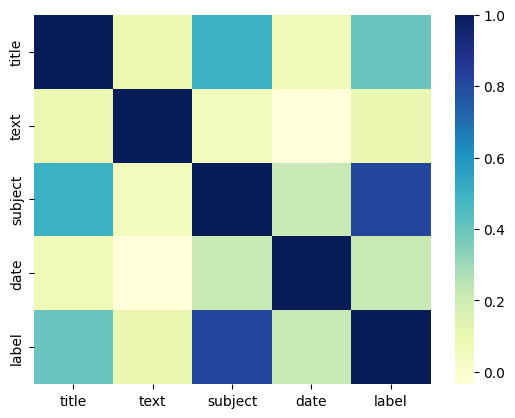

In [ ]:
sns.heatmap(correlation_matrix, cmap='YlGnBu')

Shuffling the rows

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df

,title,text,subject,date,label
0,SARAH JESSICA PARKER FEARS She’ll Be Attacked ...,"With absolutely NOTHING to back it up, Sarah J...",left-news,"Oct 5, 2016",0
1,Canadian police probe 'suspicious' deaths of b...,TORONTO (Reuters) - Canadian police said they ...,worldnews,"December 15, 2017",1
2,Right Wing Drudge Report Calls Beyoncé An ‘Ur...,Beyonc is already a favorite target of hate f...,News,"April 25, 2016",0
3,Senior Quds force commander says Trump's threa...,ANKARA (Reuters) - U.S. President Donald Trump...,worldnews,"October 13, 2017",1
4,AWESOME: TRUMP TWEETS THE TWO RULES That Will ...,The link to Instagram was the photo below:,politics,"Dec 30, 2016",0
...,...,...,...,...,...
44893,LIZ WARREN Admits To Jake Tapper 2016 Primary ...,Liz Warren flips She just told Jake Tapper in ...,politics,"Nov 2, 2017",0
44894,Richard Branson: Trump Came To Me Broke And V...,"We all know Trump is vindictive. If he wasn t,...",News,"October 25, 2016",0
44895,INFLUENTIAL HOLLYWOOD LEFTIST Looks Forward To...,How very progressive Not since the Civil Right...,left-news,"Feb 26, 2016",0
44896,Death toll from blasts in Somalia's capital Mo...,MOGADISHU (Reuters) - More than 200 people wer...,worldnews,"October 15, 2017",1


Imbalanced Datasheet

In [ ]:
df['label'].value_counts()

0    23481
1    21417
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

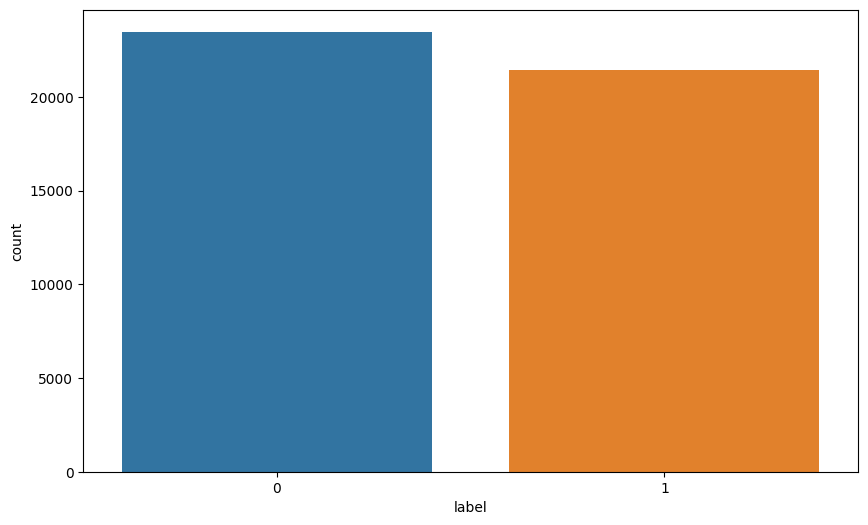

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(x='label', data = df)

# Dataset Pre-Processing

## Null Checking

Checking if any data missing

In [ ]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

## Making "Content" Column

Merging all infos of a news in a single text

In [ ]:
df['content'] = df['title'] + " " + df['subject'] + " "  + df['text']

## Dropping unnecessary columns

title, subject, text are merged into content column. So they are no more needed. Also, date column unnecessary.

In [ ]:
df = df.drop(['title', 'subject', 'text', 'date'], axis=1)

In [ ]:
df = df[['content', 'label']]

## Stemming

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
df['content'] = df['content'].apply(stemming)

In [ ]:
df

,content,label
0,trump travel ban appli peopl strong u tie cour...,1
1,italian cathol told pray silent offend muslim ...,0
2,break republican embrac trump lie investig cam...,0
3,uzbek dissid deni anti govern propaganda charg...,1
4,week row academ articl china say import public...,1
...,...,...
44893,video delusion obama restor us respect countri...,0
44894,turkey free german journalist tolu cannot leav...,1
44895,nearli half american say republican healthcar ...,1
44896,cop kill gun hillari pander black voter retrai...,0


# Vectorization

In [ ]:
vec = TfidfVectorizer()

In [ ]:
X = df['content'].values
Y = df['label'].values

In [ ]:
X = vec.fit_transform(X)

In [ ]:
X

<44898x89870 sparse matrix of type '<class 'numpy.float64'>'
	with 6947929 stored elements in Compressed Sparse Row format>

# Models Training

## Splitting Training and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle = True)

## Training Models

*   Logistic regression
*   Support Vector Machine (SVM)
*   Naive Bayes Classifiers

In [ ]:
model_LR2 = LogisticRegression(max_iter=2).fit(X_train,Y_train)
model_SVM2 = SVC(kernel='rbf', random_state = 42).fit(X_train, Y_train)
model_NB2 = ComplementNB().fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaluation (Scores on Test Sets)

## LOGISTIC REGRESSION Score

In [ ]:
LR_score = classification_report(Y_test, model_LR2.predict(X_test))
print(LR_score)

              precision    recall  f1-score   support

           0       0.52      1.00      0.69      4679
           1       0.00      0.00      0.00      4301

    accuracy                           0.52      8980
   macro avg       0.26      0.50      0.34      8980
weighted avg       0.27      0.52      0.36      8980



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


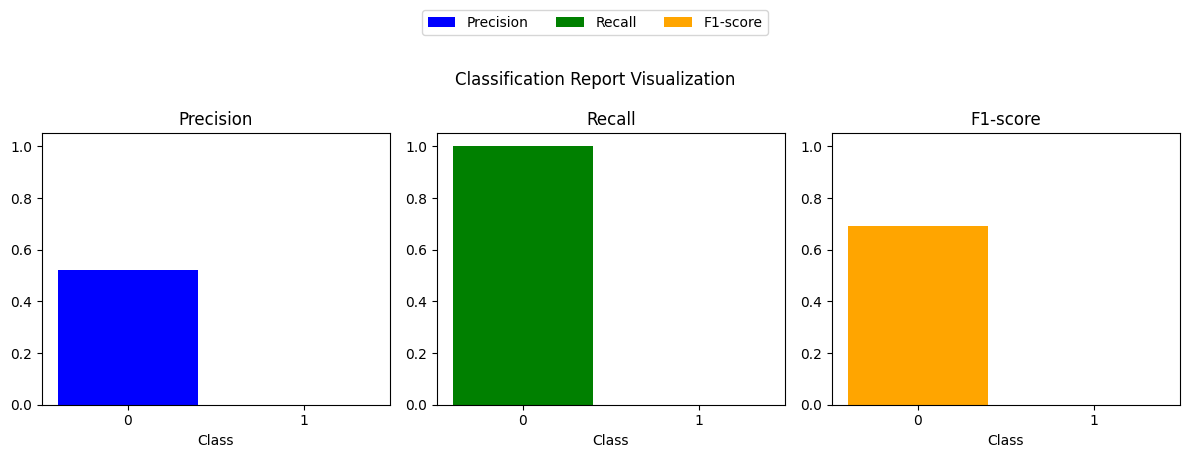

In [ ]:
import matplotlib.pyplot as plt

# Class names and metrics
class_names = ["0", "1"]
precision = [0.52, 0.00]
recall = [1.00, 0.00]
f1_score = [0.69, 0.00]
support = [4679, 4301]

# Define colors and labels for each metric
colors = ['blue', 'green', 'orange']
metric_labels = ['Precision', 'Recall', 'F1-score']

# Create subplots for each metric
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot each metric as a bar chart
for i, metric in enumerate([precision, recall, f1_score]):
    ax = axes[i]
    ax.bar(class_names, metric, color=colors[i], label=metric_labels[i])
    ax.set_xlabel('Class')
    ax.set_ylim([0, 1.05])  # Ensure y-axis range is appropriate
    ax.set_title(metric_labels[i])


# Add common legend
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.suptitle('Classification Report Visualization')
plt.tight_layout()
plt.show()


## SUPPORT VECTOR CLASSIFICATION Scores

In [ ]:
SVC_score = classification_report(Y_test, model_SVM2.predict(X_test))
print(SVC_score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4679
           1       1.00      1.00      1.00      4301

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



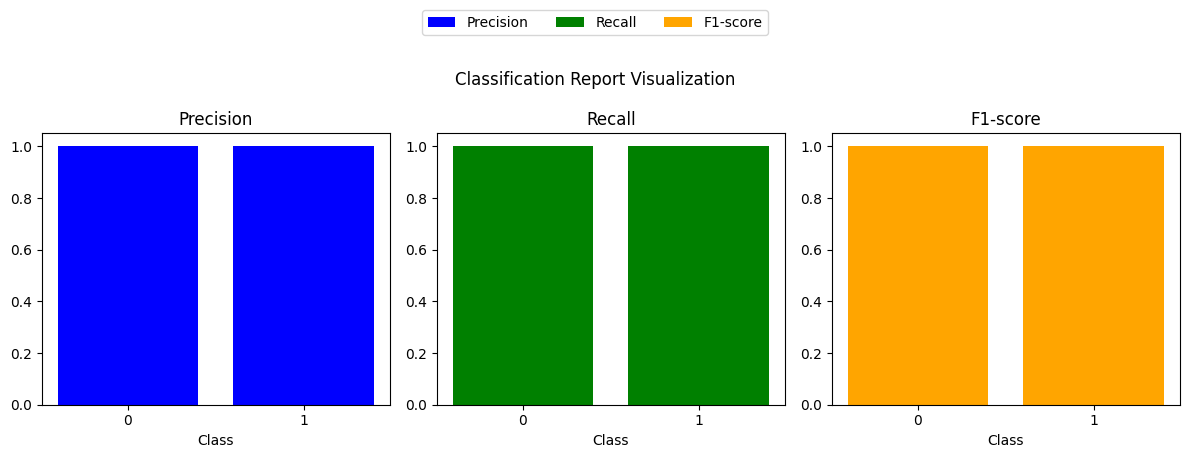

In [ ]:
import matplotlib.pyplot as plt

# Class names and metrics
class_names = ["0", "1"]
precision = [1.0, 1.0]
recall = [1.0, 1.0]
f1_score = [1.0, 1.0]
support = [4679, 4301]

# Define colors and labels for each metric
colors = ['blue', 'green', 'orange']
metric_labels = ['Precision', 'Recall', 'F1-score']

# Create subplots for each metric
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot each metric as a bar chart
for i, metric in enumerate([precision, recall, f1_score]):
    ax = axes[i]
    ax.bar(class_names, metric, color=colors[i], label=metric_labels[i])
    ax.set_xlabel('Class')
    ax.set_ylim([0, 1.05])  # Ensure y-axis range is appropriate
    ax.set_title(metric_labels[i])


# Add common legend
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.suptitle('Classification Report Visualization')
plt.tight_layout()
plt.show()


## NAIVE BAYES CLASSIFICATION Scores

In [ ]:
NB_score = classification_report(Y_test, model_NB2.predict(X_test))
print(NB_score)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4679
           1       0.94      0.93      0.94      4301

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



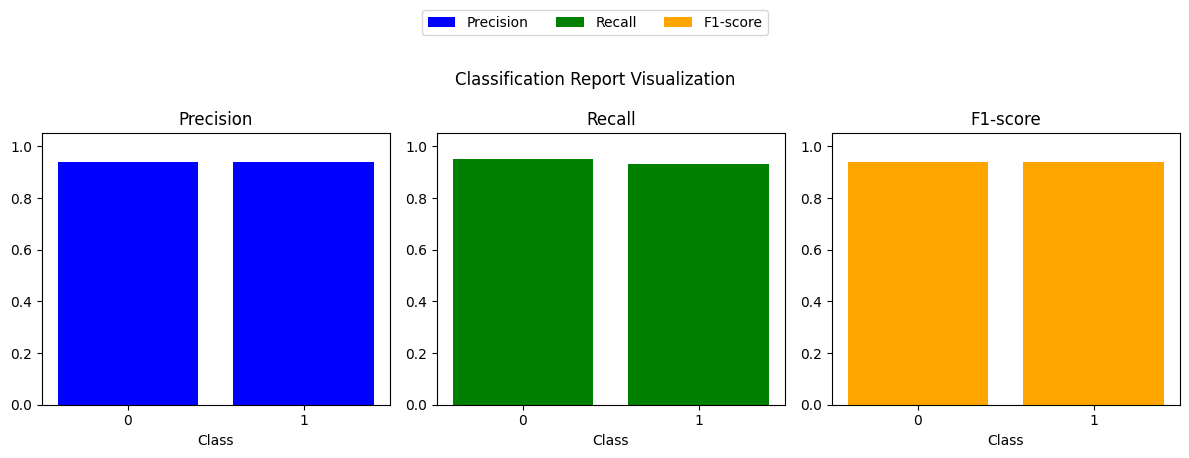

In [ ]:
import matplotlib.pyplot as plt

# Class names and metrics
class_names = ["0", "1"]
precision = [0.94, 0.94]
recall = [0.95, 0.93]
f1_score = [0.94, 0.94]
support = [4679, 4301]

# Define colors and labels for each metric
colors = ['blue', 'green', 'orange']
metric_labels = ['Precision', 'Recall', 'F1-score']

# Create subplots for each metric
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot each metric as a bar chart
for i, metric in enumerate([precision, recall, f1_score]):
    ax = axes[i]
    ax.bar(class_names, metric, color=colors[i], label=metric_labels[i])
    ax.set_xlabel('Class')
    ax.set_ylim([0, 1.05])  # Ensure y-axis range is appropriate
    ax.set_title(metric_labels[i])


# Add common legend
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.suptitle('Classification Report Visualization')
plt.tight_layout()
plt.show()


# Manual Testing

In [ ]:
def output_label(n):
  if n == 0:
    return "Fake News"
  elif n == 1:
    return "Real News"

def manual_testing(news):
  testing_news = {"text":[news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["text"] = new_def_test["text"].apply(stemming)
  new_x_test = new_def_test["text"]
  new_xv_test = vec.transform(new_x_test)
  pred_LR = model_LR2.predict(new_xv_test)
  pred_SVM = model_SVM2.predict(new_xv_test)
  pred_NB = model_NB2.predict(new_xv_test)
  return print("\nLR Prediction: {} \nSVM Prediction: {} \nNB Prediction: {}".format(output_label(pred_LR),
                                                                                      output_label(pred_SVM),
                                                                                      output_label(pred_NB)))

## User Input Testing

In [ ]:
newss = str(input())
manual_testing(newss)

In [ ]:
newss = str(input())
manual_testing(newss)